결과 확인용 link : 
https://nbviewer.jupyter.org/github/Lagom92/covid_visualize/blob/master/note/01_jin_prac_covid19.ipynb

In [41]:
#필요 라이브러리 import

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import plotly.graph_objs as go
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib inline
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import plotly.express as px

In [57]:
def pie_chart(data, col, title = ''):
    cnt_df = data[col].value_counts().reset_index()
    print(cnt_df)
    fig = px.pie(cnt_df[:10], 
                 values = col, 
                 names = 'index', 
                 title = title, 
                 template = 'seaborn',
                 color_discrete_sequence=px.colors.sequential.RdBu)
    fig.update_traces(pull=0.05, textinfo="value+percent+label")
    fig.show()

In [43]:
def line_chart(data, x_date, y_count, color, title= ''):
    # cnt_df = data.value_counts().reset_index()
    fig = px.line(data,
                 x = x_date,
                 y = y_count,
                 color=color,
                 title=title)

    fig.update_xaxes(rangeslider_visible=True)
    fig.show()


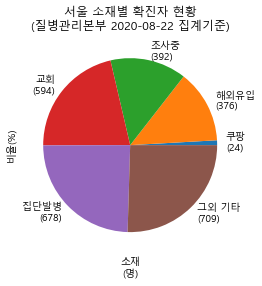

In [44]:
from matplotlib import pyplot as plt
 
plt.pie( [0.9,13.7,14.3,21.6,24.7,25.7], labels=["쿠팡\n(24)","해외유입\n(376)","조사중\n(392)","교회\n(594)","집단발병\n(678)","그외 기타\n(709)"])
# pie_chart()
plt.xlabel('소재\n(명)')
plt.ylabel('비율(%)')
plt.title('서울 소재별 확진자 현황\n(질병관리본부 2020-08-22 집계기준)')
plt.show()

In [60]:
a = pd.DataFrame({'data': [0.9,13.7,14.3,21.6,24.7,25.7], 'label':["쿠팡\n(24명)","해외유입\n(376명)","조사중\n(392명)","교회\n(594명)","집단발병\n(678명)","그외 기타\n(709명)"] })
pie_chart(a,'label','확진자')

           index  label
0  그외 기타\n(709명)      1
1   집단발병\n(678명)      1
2     교회\n(594명)      1
3   해외유입\n(376명)      1
4      쿠팡\n(24명)      1
5    조사중\n(392명)      1


In [56]:
a

,data,label
0,0.9,쿠팡\n(24명)
1,13.7,해외유입\n(376명)
2,14.3,조사중\n(392명)
3,21.6,교회\n(594명)
4,24.7,집단발병\n(678명)
5,25.7,그외 기타\n(709명)


In [46]:
df_seoul = pd.read_csv('../input/서울시 코로나19 확진자 현황.csv', encoding='ms949')
df_seoul.head(3)

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,4131,9.02.,20637,NaN,NaN,강서구,NaN,기타 확진자 접촉,NaN,NaN,확인 중,2020-09-03 11:11:12,2020-09-03 11:11:12,Y
1,4130,9.02.,20628,NaN,NaN,강동구,NaN,확인 중,NaN,NaN,확인 중,2020-09-03 11:11:12,2020-09-03 11:11:12,Y
2,4129,9.02.,20590,NaN,NaN,노원구,NaN,다래경매 관련,NaN,NaN,확인 중,2020-09-03 11:11:12,2020-09-03 11:11:12,Y


In [47]:
# 확진일 포멧 변경
df_seoul_01 = df_seoul.sort_values(by='확진일', ascending=True)
df_seoul_01['확진일'] = df_seoul_01['확진일'].str.replace(pat='.', repl='-', regex=False)
df_seoul_01['확진일'] = df_seoul_01['확진일']+'2020'
df_seoul_01['확진일'] = pd.to_datetime(df_seoul_01['확진일']).apply(lambda x:x.strftime('%Y-%m-%d'))
df_seoul_01 = df_seoul_01
df_seoul_01.head(3)


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
4130,1,2020-01-24,2,NaN,NaN,강서구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-03 11:11:04,2020-09-04 10:30:01,Y
4128,3,2020-01-30,6,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-03 11:11:04,2020-09-04 10:30:01,Y
4127,4,2020-01-30,7,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-03 11:11:04,2020-09-04 10:30:01,Y


### 
3월에 신천지 사태 5월과 6월에 이어진 여러 집단 감염에도 10명 안팎을 유지하던 구별 확진자 수가   
8월 15일 광화문 집회 및 서울사랑제일 교회 여파로 구별로 10~20명씩 확진자가 발생하는 것을 확인 할 수 있습니다.

In [48]:
df_seoul_01 = df_seoul_01[~df_seoul_01['접촉력'].isin(['확인중', '확인 중'])]
df_seoul_02 = df_seoul_01.loc[:,['연번','확진일','지역','접촉력']]
df_seoul_02 = df_seoul_02.groupby(["확진일", "지역"]).size().reset_index(name='count')
df_seoul_02 = df_seoul_02[~df_seoul_02['지역'].isin(['아산','대구','경북','재외국민','국외','부천시','파주','대전','천안','안양시','시흥','화성','미국','남양주시','김포','구리','양주시','군포','수원시','안산','주소불명','기타','하남','경기광주','중구(은평)','중구(노원)','경기','확인(동작)','인천시','고양시','용인시','광명','성남시','부평','양평','의왕','스페인'])]

line_chart(df_seoul_02, '확진일', 'count', '지역',  title = '기간별 확진자 비율')


### 구 별로 누적 확진자 수를 확인 할 수 있습니다.

In [49]:
#지역별 막대 그래프 
#스페인으로 잡혀있는 이상치 삭제
# spain_outlier = df_seoul_01[df_seoul_01['지역'] == '스페인'].index
# df_seoul_01 = df_seoul_01.drop(spain_outlier)
df_seoul_01 = df_seoul_01[~df_seoul_01['지역'].isin(['아산','대구','경북','재외국민','국외','부천시','파주','대전','천안','안양시','시흥','화성','미국','남양주시','김포','구리','양주시','군포','수원시','안산','주소불명','기타','하남','경기광주','중구(은평)','중구(노원)','경기','확인(동작)','인천시','고양시','용인시','광명','성남시','부평','양평','의왕','평택','스페인','의정부','확인(구로)','포천','타시도'])]
# df_seoul_01 = df_seoul_01.groupby(["접촉력", "지역"]).size().reset_index(name='count')
df_seoul_bar = df_seoul_01['지역'].value_counts().reset_index(name='확진자수')

fig = px.bar(df_seoul_bar, x='index', y='확진자수', title="행정구역별 접촉자 현황")
fig.show()

## 조금더 직관적으로 확인하기 위해 파이 차트로 확인하겠습니다.
 * 성북구가 가장 많은 비율을 차지 하는데 이유는 ??

In [50]:
df_province = df_seoul.copy()
pie_chart(df_province, '지역',title = '상위 10개 행정 구역 확진자 비율')

## 집담 감염 발생 비율로 이유를 확인 할 수 있습니다.
 * 사랑제일교회 관련 확진자가 많은데.. 다른 교회도 확인

In [51]:
df_province2 = df_province[~df_province['접촉력'].isin(['확인중', '확인 중'])]
pie_chart(df_province2, '접촉력',title = '집단전염 비율')

## 교회별 확진자 비율


In [52]:
#교회별 확진자 비율
contact = df_province['접촉력'].value_counts()
church = []
for i in contact.index:
    if '교회' in i:
        church.append(i)
church_peoples = df_province[df_province['접촉력'].isin(church)]
church_peoples['접촉력'].value_counts()

pie_chart(church_peoples, '접촉력',title = ' ')